<h1 style="text-align: center;">Task: Implementing Thresholding</h1>

## Student Information

**Name:** Swarab Raul  
**Registration Number:** 21BAI1225  
**Date:** August 19, 2024

**1. Fixed Thresholding**
Fixed thresholding is a simple method where we choose a threshold value, and any pixel intensity value above the threshold is set to one value (e.g., white), and any pixel intensity below the threshold is set to another value (e.g., black).

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('./Dog.jpg', cv2.IMREAD_GRAYSCALE)

In [3]:
# Apply Fixed Thresholding
_, fixed_thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

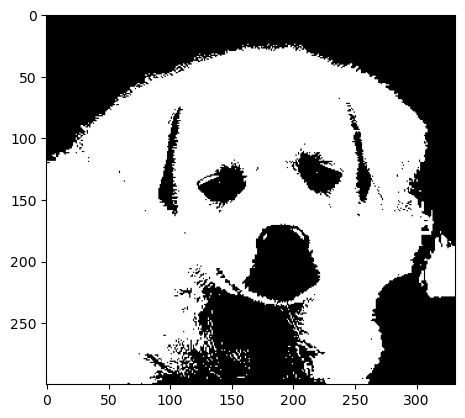

In [15]:
plt.imshow(fixed_thresh, cmap='gray')

**2. OTSU's Thresholding**
OTSU's method automatically calculates the optimal threshold value for a bimodal image (an image with two peaks in its histogram).

In [6]:
# Apply OTSU's Thresholding
_, otsu_thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

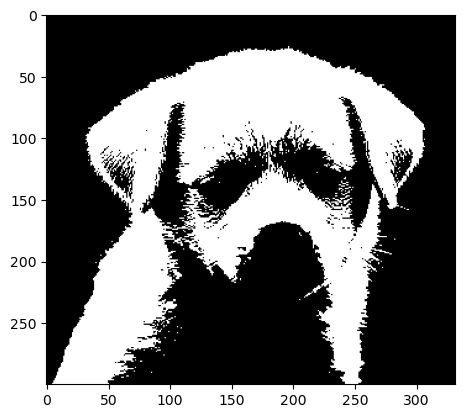

In [16]:
plt.imshow(otsu_thresh, cmap='gray')

**3. Adaptive Mean Thresholding**
In Adaptive Mean Thresholding, the threshold value is the mean of the neighborhood area minus a constant.

In [8]:
# Apply Adaptive Mean Thresholding
adaptive_mean_thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                             cv2.THRESH_BINARY, 11, 2)

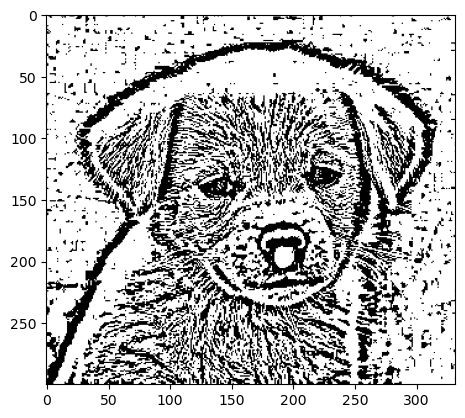

In [17]:
plt.imshow(adaptive_mean_thresh, cmap='gray')

**4. Adaptive Gaussian Thresholding**
In Adaptive Gaussian Thresholding, the threshold value is a weighted sum (Gaussian window) of the neighborhood values minus a constant.

In [11]:
adaptive_gaussian_thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                                 cv2.THRESH_BINARY, 11, 2)

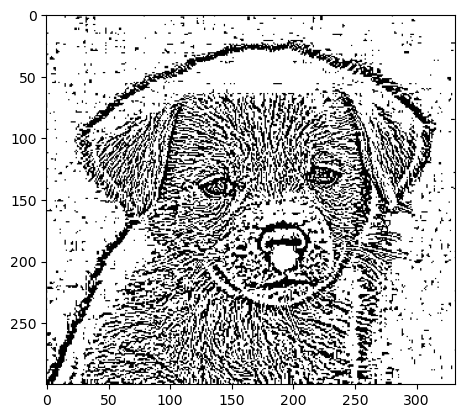

In [18]:
plt.imshow(adaptive_gaussian_thresh, cmap='gray')

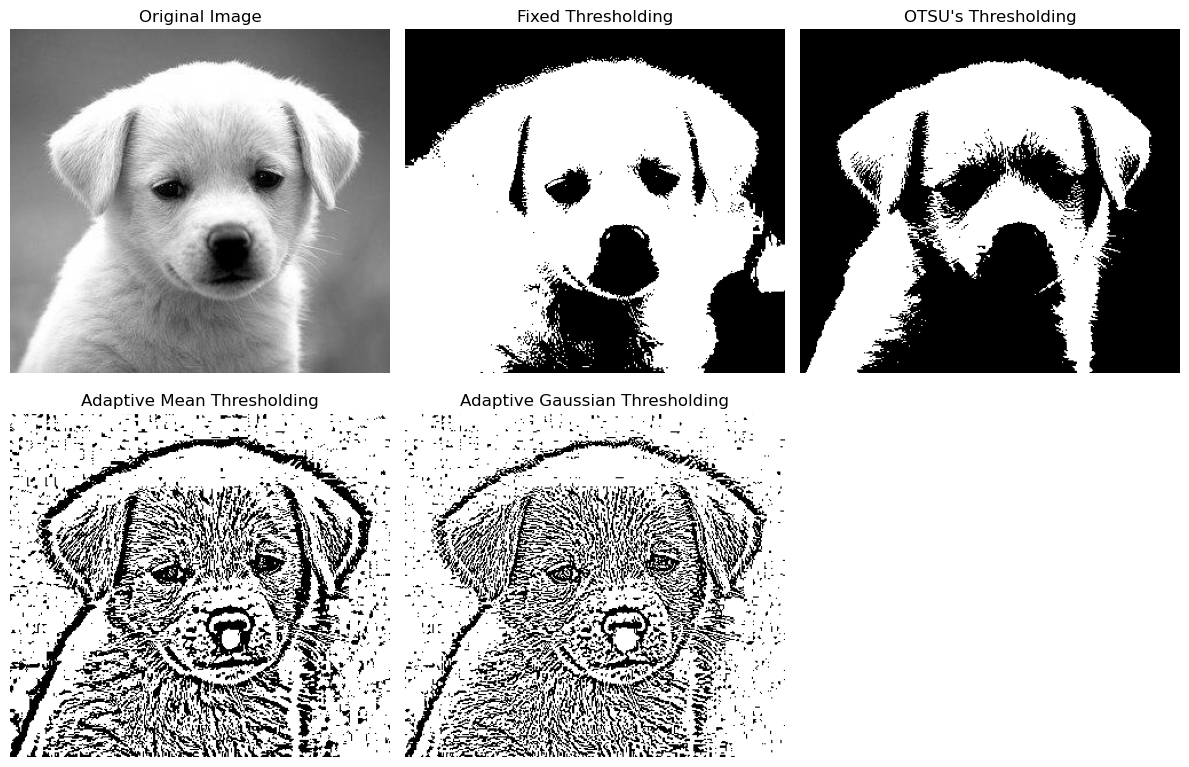

In [14]:
# Plotting the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(fixed_thresh, cmap='gray')
plt.title('Fixed Thresholding')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(otsu_thresh, cmap='gray')
plt.title("OTSU's Thresholding")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(adaptive_mean_thresh, cmap='gray')
plt.title('Adaptive Mean Thresholding')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(adaptive_gaussian_thresh, cmap='gray')
plt.title('Adaptive Gaussian Thresholding')
plt.axis('off')

plt.tight_layout()
plt.show()

#### Summary:
- **Fixed Thresholding** is straightforward but requires a pre-defined threshold value.
- **OTSU's Thresholding** is optimal for bimodal images.
- **Adaptive Mean** and **Adaptive Gaussian Thresholding** are better for images with varying lighting conditions.

---

# Task: Manually Implementing Thresholding Methods

**1. Fixed Thresholding (Manual Implementation)**

In [19]:
image = cv2.imread('./Dog.jpg', cv2.IMREAD_GRAYSCALE)

def fixed_threshold(image, threshold):
    return np.where(image > threshold, 255, 0).astype(np.uint8)

fixed_thresh = fixed_threshold(image, 127)

**2. OTSU's Thresholding (Manual Implementation)**

In [20]:
def otsu_threshold(image):
    pixel_counts = np.bincount(image.ravel(), minlength=256)
    s_max = (0,-10)
    for threshold in range(256):
        w0 = sum(pixel_counts[:threshold])
        w1 = sum(pixel_counts[threshold:])
        if w0 == 0 or w1 == 0:
            continue
        mu0 = sum([i * pixel_counts[i] for i in range(0, threshold)]) / w0
        mu1 = sum([i * pixel_counts[i] for i in range(threshold, 256)]) / w1
        # Inter-class variance
        s = w0 * w1 * (mu0 - mu1) ** 2
        if s > s_max[1]:
            s_max = (threshold, s)
    threshold = s_max[0]
    return np.where(image > threshold, 255, 0).astype(np.uint8)

otsu_thresh = otsu_threshold(image)

**3. Adaptive Mean Thresholding (Manual Implementation)**

In [21]:
def adaptive_mean_threshold(image, block_size, C):
    half_block = block_size // 2
    padded_image = np.pad(image, pad_width=half_block, mode='constant', constant_values=0)
    adaptive_thresh = np.zeros_like(image)
    
    for i in range(half_block, padded_image.shape[0] - half_block):
        for j in range(half_block, padded_image.shape[1] - half_block):
            local_block = padded_image[i-half_block:i+half_block+1, j-half_block:j+half_block+1]
            local_thresh = np.mean(local_block) - C
            adaptive_thresh[i-half_block, j-half_block] = 255 if image[i-half_block, j-half_block] > local_thresh else 0

    return adaptive_thresh

adaptive_mean_thresh = adaptive_mean_threshold(image, 11, 2)

**4. Adaptive Gaussian Thresholding (Manual Implementation)**

In [22]:
from scipy.ndimage import gaussian_filter

def adaptive_gaussian_threshold(image, block_size, C):
    half_block = block_size // 2
    padded_image = np.pad(image, pad_width=half_block, mode='constant', constant_values=0)
    adaptive_thresh = np.zeros_like(image)
    
    gaussian_image = gaussian_filter(padded_image, sigma=block_size/6.0)

    for i in range(half_block, padded_image.shape[0] - half_block):
        for j in range(half_block, padded_image.shape[1] - half_block):
            local_thresh = gaussian_image[i, j] - C
            adaptive_thresh[i-half_block, j-half_block] = 255 if image[i-half_block, j-half_block] > local_thresh else 0

    return adaptive_thresh

adaptive_gaussian_thresh = adaptive_gaussian_threshold(image, 11, 2)

##### Visualizing the Results

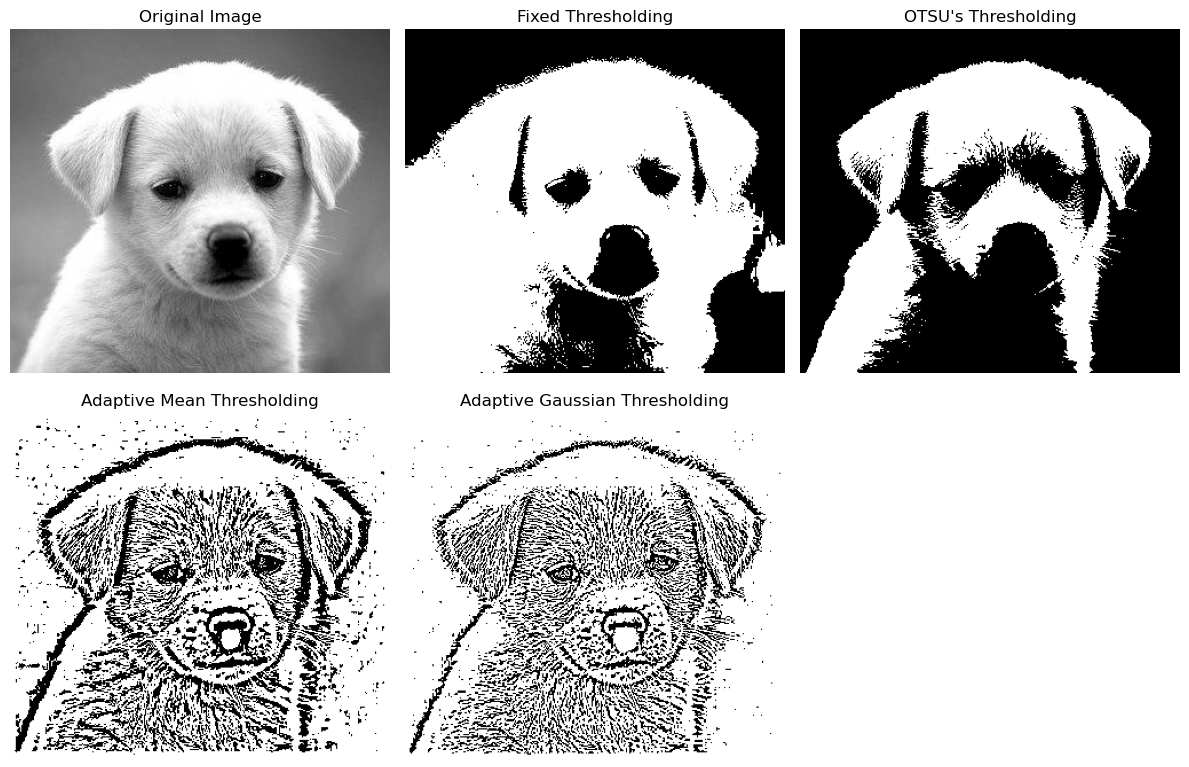

In [23]:
# Plotting the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(fixed_thresh, cmap='gray')
plt.title('Fixed Thresholding')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(otsu_thresh, cmap='gray')
plt.title("OTSU's Thresholding")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(adaptive_mean_thresh, cmap='gray')
plt.title('Adaptive Mean Thresholding')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(adaptive_gaussian_thresh, cmap='gray')
plt.title('Adaptive Gaussian Thresholding')
plt.axis('off')

plt.tight_layout()
plt.show()


**Explanation:**
- Fixed Thresholding is implemented by setting a pixel value to 255 if it's above a certain threshold, and 0 otherwise.
- OTSU's Thresholding is manually computed by finding the optimal threshold that maximizes the inter-class variance.
- Adaptive Mean Thresholding calculates the mean of a local block around each pixel and subtracts a constant to set the threshold.
- Adaptive Gaussian Thresholding uses a Gaussian-weighted sum for the local block to determine the threshold.